# TSNE and PCA for item vector representations


In [31]:
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import time 

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.plotting import reset_output

output_notebook()

%matplotlib inline

Loading BokehJS ...

## Load Metadata

In [2]:
df = pd.read_json(r'D:\Datasets\amazon_reviews\processed\reviews_Toys_and_Games_5.json')
df_train, df_test = train_test_split(df, test_size = 0.3, stratify=df['reviewerID'], random_state=42)
asins_map = {v:k for k,v in enumerate(df_train['asin'].unique())}

In [3]:
df_train.shape

(117317, 11)

In [23]:
asins_map_rev = {v:k for k,v in asins_map.items()}

## Load Item Vectors

In [5]:
U_V_PATH = r'D:/Models/thesis/sdae-sgd/sdae_sgd_optimized4/pickles/'

In [6]:
with open(U_V_PATH + 'mx_epoch_35.pickle', 'rb') as handle:
    mats = pickle.load(handle)

In [7]:
qi = mats['qi']

In [25]:
qi.shape

(50038, 25)

### PCA

In [27]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(qi)
#df['pca-one'] = pca_result[:,0]
#df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06270374 0.05898249 0.05626283]


In [28]:
pca_result.shape

(50038, 3)

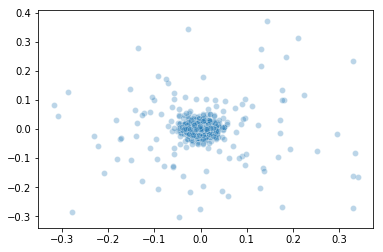

In [29]:
plt.figure()
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

In [34]:
# bokeh
fig = figure()

fig.scatter(x=pca_result[:, 0], y=pca_result[:, 1])

show(fig)

In [36]:
reset_output()

## TSNE

In [15]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3000)
tsne_results = tsne.fit_transform(qi)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 50038 samples in 0.099s...
[t-SNE] Computed neighbors for 50038 samples in 201.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50038
[t-SNE] Computed conditional probabilities for sample 2000 / 50038
[t-SNE] Computed conditional probabilities for sample 3000 / 50038
[t-SNE] Computed conditional probabilities for sample 4000 / 50038
[t-SNE] Computed conditional probabilities for sample 5000 / 50038
[t-SNE] Computed conditional probabilities for sample 6000 / 50038
[t-SNE] Computed conditional probabilities for sample 7000 / 50038
[t-SNE] Computed conditional probabilities for sample 8000 / 50038
[t-SNE] Computed conditional probabilities for sample 9000 / 50038
[t-SNE] Computed conditional probabilities for sample 10000 / 50038
[t-SNE] Computed conditional probabilities for sample 11000 / 50038
[t-SNE] Computed conditional probabilities for sample 12000 / 50038
[t-SNE] Computed conditional probabilities for 

In [20]:
fig = figure()

fig.scatter(x=tsne_results[:, 0][0:100], y=tsne_results[:, 1][0:100], fill_alpha=0.5)

show(fig)

In [38]:
reset_output()